In [1]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

In [2]:
def start_play(state:State):
    print("Start play node has been called")
    return {"graph_info":state["graph_info"] + " I am planning to play"}


In [3]:
def play_cricket(state:State):
    print("Cricket node has been called")
    return {"graph_info":state["graph_info"] + " I am planning to play Cricket"}

In [4]:
def play_badminton(state:State):
    print("Badminton node has been called")
    return {"graph_info":state["graph_info"] + " I am planning to play Badminton"}

In [5]:
import random
from typing import Literal

def random_play(state:State)->Literal['cricket','badminton']:
    graph_info=state['graph_info']
    if random.random()>0.5:
        return 'cricket'
    else:
        return 'badminton'


In [6]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

### Building the Graph

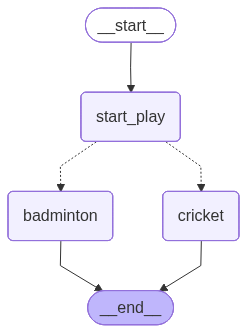

In [7]:
graph=StateGraph(State)
### Add node
graph.add_node("start_play",start_play)
graph.add_node("cricket",play_cricket)
graph.add_node("badminton",play_badminton)
### Add Edge
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("badminton",END)
graph.add_edge("cricket",END)
### compile the graph
graph_builder=graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [12]:
### Graph invokation
graph_builder.invoke({"graph_info":"My name is Sachchida"})

Start play node has been called
Cricket node has been called


{'graph_info': 'My name is Sachchida I am planning to play I am planning to play Cricket'}